In [1]:
##Logarithmic regression model

In [26]:
##Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import mode

In [50]:
##Read csv from path
dataset = pd.read_csv("new_data.csv")

In [4]:
##Check csv original
dataset.head()

,Route,Avg. 2011 Ridership,Avg. 2016 Ridership,Ridership Change %,# of Stops,# of Stops near Subway,Borough
0,BX1,38891,36487,-6%,47,19,Bronx
1,BX2,38891,36487,-6%,50,18,Bronx
2,BX3,15800,14921,-6%,28,3,Bronx
3,BX4,12141,11411,-6%,32,16,Bronx
4,BX4A,12141,11411,-6%,35,13,Bronx


In [8]:
## FORMATTING COLUMNS
##drop route coulmn
## dataset = dataset.drop('Route', axis=1)
##drop Avg. 2011 Ridership coulmn
## dataset = dataset.drop('Avg. 2011 Ridership', axis=1)
##drop Ridership Change % coulmn
## dataset = dataset.drop('Ridership Change %', axis=1) 
##drop Ridership Change % coulmn
## dataset = dataset.drop('Ridership Change %', axis=1) 
##drop # of Stops coulmn
## dataset = dataset.drop('# of Stops', axis=1) 
##drop Borough coulmn
## dataset = dataset.drop('Borough', axis=1) 

In [25]:
dataset.head()

,Avg. 2016 Ridership,# of Stops near Subway
0,36487,19
1,36487,18
2,14921,3
3,11411,16
4,11411,13


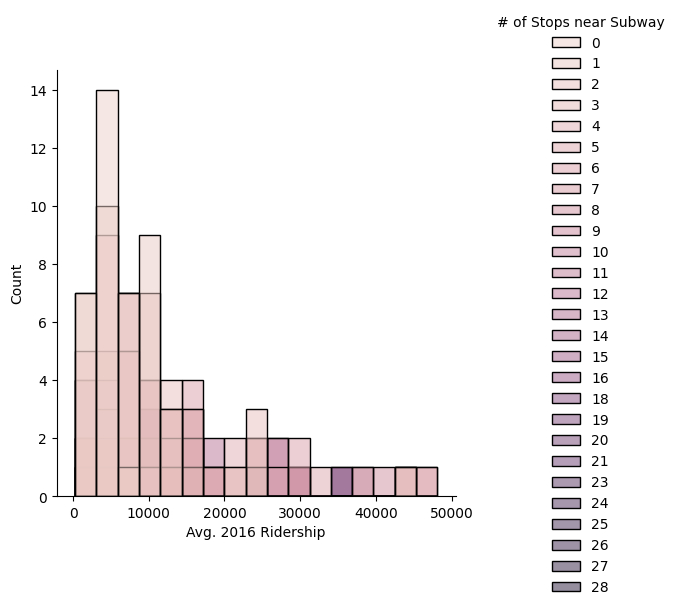

In [24]:
##Visualize data
sns.displot(dataset, x = 'Avg. 2016 Ridership', hue = '# of Stops near Subway')

In [40]:
##Split Data
Y = dataset.drop('# of Stops near Subway', axis=1)
X = dataset['# of Stops near Subway']
ln_Y = np.log(Y)

In [33]:
print(X)
print(Y)

0      19
1      18
2       3
3      16
4      13
       ..
247     0
248     1
249     0
250     0
251     0
Name: # of Stops near Subway, Length: 252, dtype: int64
     Avg. 2016 Ridership
0                  36487
1                  36487
2                  14921
3                  11411
4                  11411
..                   ...
247                 4431
248                 3686
249                 7016
250                 7299
251                 7702

[252 rows x 1 columns]


In [41]:
### Use the relation ln(Y) = ln(A) - BX to fit X to ln(Y)
exp_reg = LinearRegression()
exp_reg.fit(X.values.reshape(-1,1), ln_Y)

LinearRegression()

In [44]:
exp_reg_weighted = LinearRegression()
exp_reg_weighted.fit(X.values.reshape(-1,1), ln_Y, sample_weight=np.array(1/((X - 100).values**2)).reshape(-1))

LinearRegression()

In [48]:
### Get predicted values of Y
Y_pred = np.exp(exp_reg.predict(X.values.reshape(-1,1)))
Y_pred_weighted = np.exp(exp_reg_weighted.predict(X.values.reshape(-1,1)))

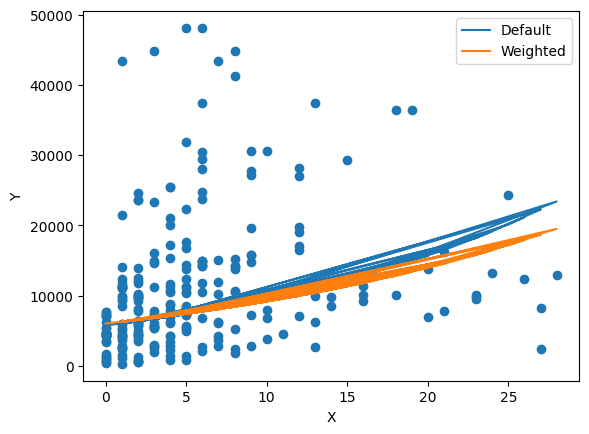

In [51]:
### Plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, label='Default')
plt.plot(X, Y_pred_weighted, label='Weighted')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()